<a href="https://colab.research.google.com/github/YisusKraizz/Unidad3/blob/main/Unidad3/Practica6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Practica 6: Simular las Llegadas de clientes y tiempos de servicio

##Método de la Transformada Inversa:

Este método genera variables aleatorias de una distribución específica, transformando números uniformes (0,1) en variables deseadas.

##Ejemplo en una Tienda Departamental de Electrónicos:

En este escenario, utilizamos el método de la transformada inversa para modelar dos situaciones:

Llegadas de clientes (Distribución Poisson):

Contexto: Los clientes llegan aleatoriamente a una tienda de electrónicos, con un promedio de 10 clientes por hora.

Modelo: La distribución Poisson modela estas llegadas, adecuada para eventos aleatorios e independientes con una tasa constante.

Fórmula: La probabilidad de
𝑘
 llegadas se calcula usando la fórmula de Poisson.

Tiempo de servicio (Distribución Exponencial):

Contexto: El tiempo de atención a cada cliente en la tienda es aleatorio, con un promedio de 15 minutos por cliente.

Modelo: La distribución exponencial se usa para modelar los tiempos entre eventos, adecuada para tiempos de servicio aleatorios con una tasa constante de ocurrencia.

Fórmula: La función de densidad de probabilidad (PDF) se utiliza para calcular estos tiempos.

Aplicación del Método de la Transformada Inversa:

Llegadas de clientes (Poisson):

Generar un número aleatorio
𝑈
 uniforme.

Calcular la función de distribución acumulada (FDA) de Poisson.

Encontrar el menor valor de
𝑘
 tal que
𝐹
(
𝑘
)
≥
𝑈
.

Tiempo de servicio (Exponencial):

Generar un número aleatorio
𝑈
 uniforme.

Aplicar la fórmula inversa:
𝑡
=
−
1
𝜆
ln
⁡
(
1
−
𝑈
)
 para obtener el tiempo de servicio.

#Ejemplo en Python:

El siguiente código combina ambas distribuciones para simular las llegadas de clientes y los tiempos de servicio, permitiendo a la tienda optimizar su personal y minimizar tiempos de espera:

<ipython-input-1-4c51d4b5d0f5>:16: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return (l ** k) * np.exp(-l) / np.math.factorial(k)


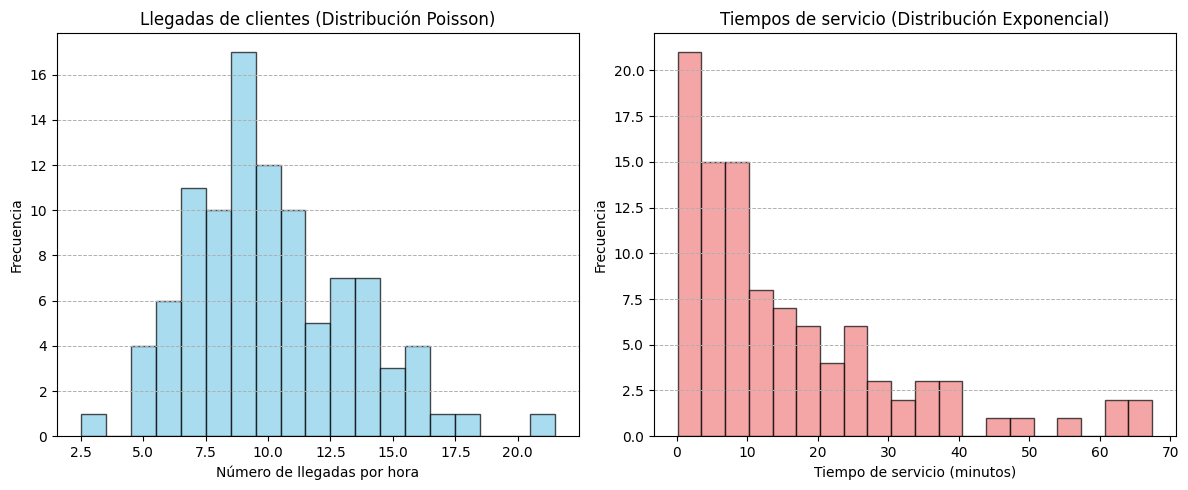

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import comb

# Parámetros de la tienda
n = 10  # Número de visitantes diarios
p = 0.30 # Probabilidad de compra
lambda_poisson = 10  # Tasa de llegadas por hora
lambda_exponencial = 1 / 15  # Tasa de servicio (clientes atendidos por minuto)

# Número de simulaciones
num_simulaciones = 100

# Generar llegadas de clientes (Distribución Poisson)
def poisson_pmf(l, k):
    return (l ** k) * np.exp(-l) / np.math.factorial(k)

def poisson_inverse_transform(l, U):
    F_k = 0
    k = 0
    while True:
        F_k += poisson_pmf(l, k)
        if U <= F_k:
            return k
        k += 1

# Generar tiempos de servicio (Distribución Exponencial)
def exponencial_inverse_transform(lambda_exponencial, U):
    return -np.log(1 - U) / lambda_exponencial

U_poisson = np.random.uniform(0, 1, num_simulaciones)
U_exponencial = np.random.uniform(0, 1, num_simulaciones)

llegadas = [poisson_inverse_transform(lambda_poisson, u) for u in U_poisson]
tiempos_servicio = [exponencial_inverse_transform(lambda_exponencial, u) for u in U_exponencial]

# Graficar resultados
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(llegadas, bins=np.arange(min(llegadas), max(llegadas) + 2) - 0.5, edgecolor='black', color='skyblue', alpha=0.7)
plt.title("Llegadas de clientes (Distribución Poisson)")
plt.xlabel("Número de llegadas por hora")
plt.ylabel("Frecuencia")
plt.grid(axis='y', linestyle='--', linewidth=0.7)

plt.subplot(1, 2, 2)
plt.hist(tiempos_servicio, bins=20, edgecolor='black', color='lightcoral', alpha=0.7)
plt.title("Tiempos de servicio (Distribución Exponencial)")
plt.xlabel("Tiempo de servicio (minutos)")
plt.ylabel("Frecuencia")
plt.grid(axis='y', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()


Llegadas simuladas por hora:
[9, 14, 9, 7, 11, 10, 11, 6, 8, 8, 11, 8, 11, 8, 8, 9, 10, 7, 10, 7, 8, 15, 6, 14, 11, 11, 8, 9, 10, 7, 13, 7, 5, 11, 14, 14, 14, 5, 8, 7, 11, 13, 10, 5, 6, 11, 12, 13, 10, 16, 14, 16, 11, 11, 11, 6, 4, 11, 12, 10, 6, 16, 11, 10, 12, 9, 10, 8, 11, 11, 5, 10, 11, 11, 14, 7, 9, 18, 7, 9, 8, 13, 8, 7, 14, 13, 14, 10, 10, 5, 10, 9, 9, 10, 14, 7, 12, 8, 12, 12, 14, 7, 9, 6, 15, 9, 7, 10, 13, 10, 9, 12, 7, 10, 11, 11, 10, 12, 12, 10, 8, 13, 7, 12, 12, 5, 11, 9, 5, 6, 15, 8, 7, 7, 16, 14, 17, 6, 5, 4, 11, 9, 16, 5, 10, 7, 11, 13, 11, 21, 11, 12, 7, 4, 9, 11, 6, 8, 8, 8, 10, 11, 5, 10, 8, 13, 12, 15, 14, 13, 8, 10, 8, 6, 5, 16, 13, 14, 12, 17, 11, 13, 13, 10, 14, 9, 10, 10, 6, 7, 4, 3, 10, 13, 10, 9, 8, 12, 7, 15, 9, 8, 11, 10, 5, 11, 12, 14, 6, 13, 9, 6, 17, 9, 6, 13, 9, 16, 6, 17, 11, 13, 9, 15, 9, 16, 8, 9, 11, 14, 11, 7, 14, 12, 12, 9, 9, 13, 11, 17, 11, 15, 9, 10, 7, 7, 8, 6, 9, 9, 14, 12, 18, 8, 13, 14, 6, 11, 4, 10, 13, 11, 10, 9, 8, 12, 4, 8, 11, 7, 4, 12, 

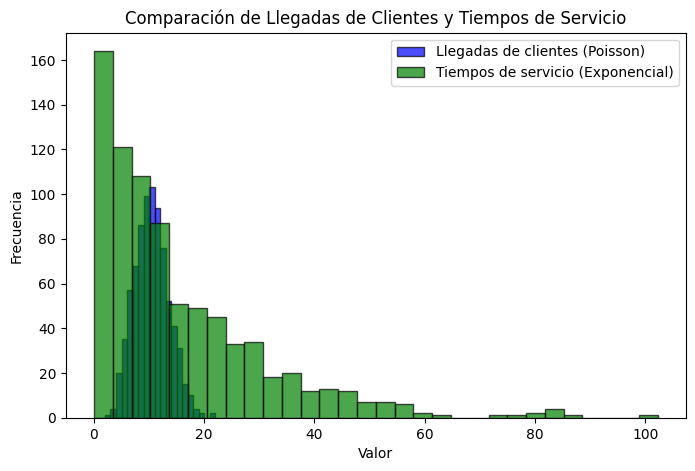

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Parámetros del modelo
lambda_llegadas = 10  # Llegadas promedio de clientes por hora (Poisson)
tiempo_servicio_promedio = 15  # Tiempo promedio de servicio en minutos (Exponencial)
lambda_servicio = 1 / tiempo_servicio_promedio  # Tasa para la distribución exponencial

# Generar llegadas de clientes usando la distribución Poisson (transformada inversa)
def poisson_inverse_transform(lambda_poisson, U):
    F_k = 0  # Inicializamos la FDA
    k = 0
    while True:
        F_k += (lambda_poisson ** k) * math.exp(-lambda_poisson) / math.factorial(k)
        if U <= F_k:
            return k
        k += 1

# Generar tiempos de servicio usando la distribución Exponencial (transformada inversa)
def exponencial_inverse_transform(lambda_servicio, U):
    return -math.log(1 - U) / lambda_servicio

# Simulación de 8 horas en la tienda departamental
num_horas = 8
num_simulaciones = 100  # Número de simulaciones
llegadas_simuladas = []
servicios_simulados = []

# Simulamos para cada hora
for _ in range(num_horas):
    # Generamos un número de clientes por hora (Poisson)
    U_llegadas = np.random.uniform(0, 1, num_simulaciones)
    llegadas_hora = [poisson_inverse_transform(lambda_llegadas, u) for u in U_llegadas]
    llegadas_simuladas.extend(llegadas_hora)

    # Generamos los tiempos de servicio para cada cliente (Exponencial)
    U_servicio = np.random.uniform(0, 1, len(llegadas_hora))
    tiempos_servicio = [exponencial_inverse_transform(lambda_servicio, u) for u in U_servicio]
    servicios_simulados.extend(tiempos_servicio)

# Mostrar resultados
print("Llegadas simuladas por hora:")
print(llegadas_simuladas)
print("Tiempos de servicio (en minutos) simulados:")
print(servicios_simulados)

# Graficar los resultados en un solo gráfico superpuesto
plt.figure(figsize=(8, 5))

# Graficar llegadas (Poisson)
plt.hist(llegadas_simuladas, bins=range(0, max(llegadas_simuladas)+1), alpha=0.7, label="Llegadas de clientes (Poisson)", color='blue', edgecolor='black')

# Graficar tiempos de servicio (Exponencial)
plt.hist(servicios_simulados, bins=30, alpha=0.7, label="Tiempos de servicio (Exponencial)", color='green', edgecolor='black')

# Títulos y etiquetas
plt.title("Comparación de Llegadas de Clientes y Tiempos de Servicio")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")

# Mostrar leyenda
plt.legend(loc='upper right')

# Mostrar gráfico
plt.show()

#Conclusión:

La simulación combinada de ambos modelos permite a los gerentes de la tienda optimizar la asignación de personal y minimizar los tiempos de espera, mejorando la eficiencia operativa. Con esta técnica, es posible prever de manera realista la interacción entre la cantidad de clientes y los tiempos de servicio, lo que se traduce en una gestión más eficaz de los recursos y una mejor experiencia para los clientes. Esta metodología puede aplicarse a diversos contextos donde la distribución de eventos y tiempos es crucial para la planificación y operación eficiente.